In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#read dataset into a data frame

df_original = pd.read_csv("study_performance.csv")

In [3]:
#overview of dataset 
df = df_original.rename(columns= {'gender':'Gender', 'race_ethnicity': 'Race','parental_level_of_education':'Parental Education Level','lunch':'Lunch','test_preparation_course': 'Test Prep Course','math_score': 'Math Score', 'reading_score':'Read Score', 'writing_score': 'Write Score'})
df

,Gender,Race,Parental Education Level,Lunch,Test Prep Course,Math Score,Read Score,Write Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
#Dataframe Categorical table
info =  {
    'variable': ['Gender','Race','Parental Education Level', 'Lunch', 'Test Prep Course', 'Math Score', 'Read Score', 'Write Score'],
    'Label': ['Gender of individual (male/female)', 'Race by ethnicity sorted into groups', "Student's parent educational level reached", 'Lunch plan of the student', 'Did the student complete a test preperation course', 'Math score of the student', 'Reading score of the student', 'Writing score of the student'],
    "General Type": ['Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quanititative', 'Quantitative', 'Quantitative'],
    'Specific Type': ['Nominal', 'Nominal', 'Ordinak', 'Nominal','Nominal', 'Continuous', 'Continuous', 'Continuous'],
    'Measurement Unit': ['N/A','N/A','N/A','N/A','N/A','Percentage Grade', 'Percentage Grade', 'Percentage Grade']   
}

info_df = pd.DataFrame(info)
info_df

,variable,Label,General Type,Specific Type,Measurement Unit
0,Gender,Gender of individual (male/female),Categorical,Nominal,N/A
1,Race,Race by ethnicity sorted into groups,Categorical,Nominal,N/A
2,Parental Education Level,Student's parent educational level reached,Categorical,Ordinak,N/A
3,Lunch,Lunch plan of the student,Categorical,Nominal,N/A
4,Test Prep Course,Did the student complete a test preperation co...,Categorical,Nominal,N/A
5,Math Score,Math score of the student,Quanititative,Continuous,Percentage Grade
6,Read Score,Reading score of the student,Quantitative,Continuous,Percentage Grade
7,Write Score,Writing score of the student,Quantitative,Continuous,Percentage Grade


In [5]:
#Descriptive statistics 
descriptiion = df.describe()
df


,Gender,Race,Parental Education Level,Lunch,Test Prep Course,Math Score,Read Score,Write Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
#STARTED - UNIVERIATE ANALYSIS 
#Gender mapping and replacement 

gender_mapping = {'male': 1, 'female': 0}
df['Gender'] = df['Gender'].replace(gender_mapping)
df



/var/folders/hg/y8r1z8rj60l0wxlxmbttxsf00000gn/T/ipykernel_818/3766641216.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)


,Gender,Race,Parental Education Level,Lunch,Test Prep Course,Math Score,Read Score,Write Score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


In [51]:
#Gender univeriate analysis

#Summary statisitcs
df_gender = df['Gender']


Gender
female    518
male      482
Name: count, dtype: int64


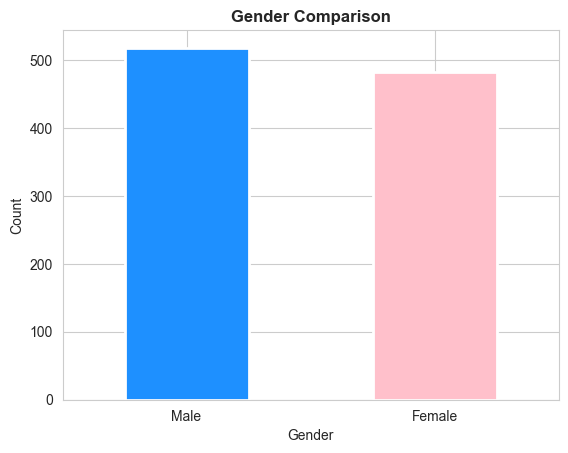

In [150]:
#Gender - bar chart with matplotlib 
gender_count = df['Gender'].value_counts()
print(gender_count)
#bar chart 
ax = (gender_count.plot(kind='bar',color=['dodgerblue','pink'], linewidth=2))
plt.title('Gender Comparison',fontweight='bold')
plt.xlabel('Gender')
ax.set_xticklabels(['Male', 'Female'], rotation=0)
plt.ylabel('Count')
plt.show()


Race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


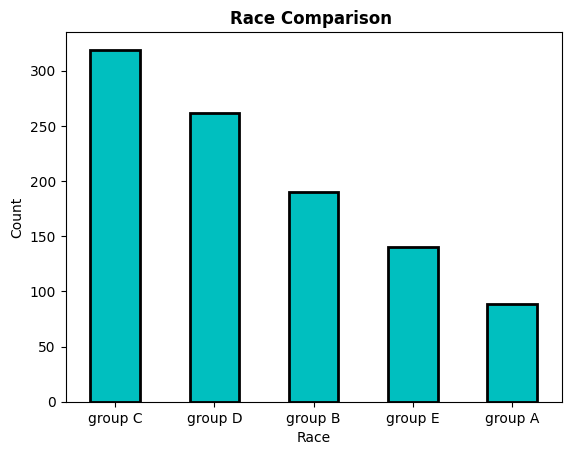

In [17]:
#Race
df_race = df['Race']

#unique values
df_race_values = list(set(df_race))

#charts 
race_count = df_race.value_counts()

race_chart = race_count.plot(kind='bar', color='c',edgecolor='black', linewidth=2)
plt.title('Race Comparison ',fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Count')

print(race_count)
plt.show()

Parental Education Level
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


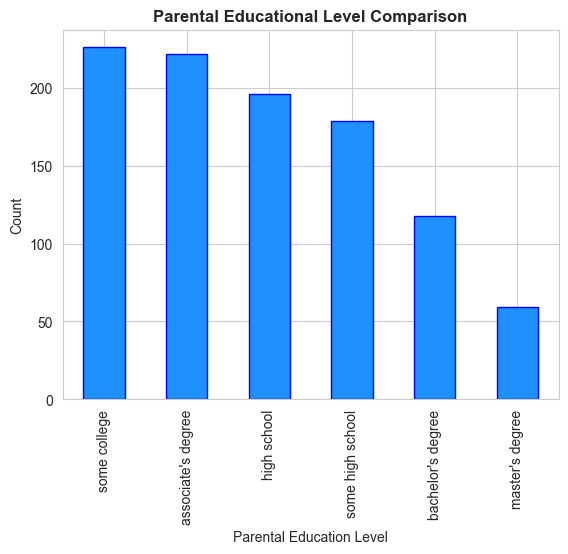

In [149]:
#Parental Education level 

p_df = df['Parental Education Level'].value_counts()

#chart
px = p_df.plot(kind='bar',color='dodgerblue', edgecolor='blue')
plt.title('Parental Educational Level Comparison',fontweight='bold')
plt.ylabel('Count')

print(p_df)
plt.show()

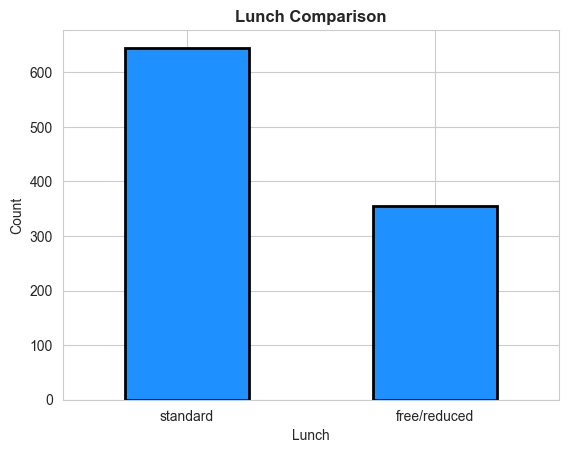

In [154]:
#Lunch 
lunch_count = df['Lunch'].value_counts()

#chart of lunch variable
lx = lunch_count.plot(kind='bar', color='dodgerblue',edgecolor='black',linewidth=2)
plt.title('Lunch Comparison',fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

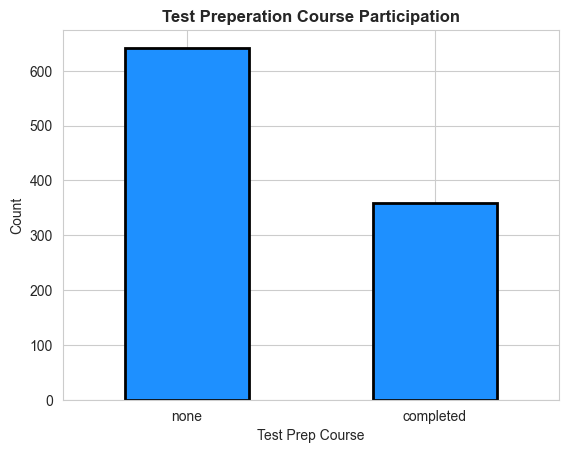

Test Prep Course
none         642
completed    358
Name: count, dtype: int64


In [152]:
#Test Preperation Course

test_prep_count = df['Test Prep Course'].value_counts()

tpx = test_prep_count.plot(kind='bar', color='dodgerblue', edgecolor='black', linewidth=2)
plt.title('Test Preperation Course Participation', fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

print(test_prep_count)

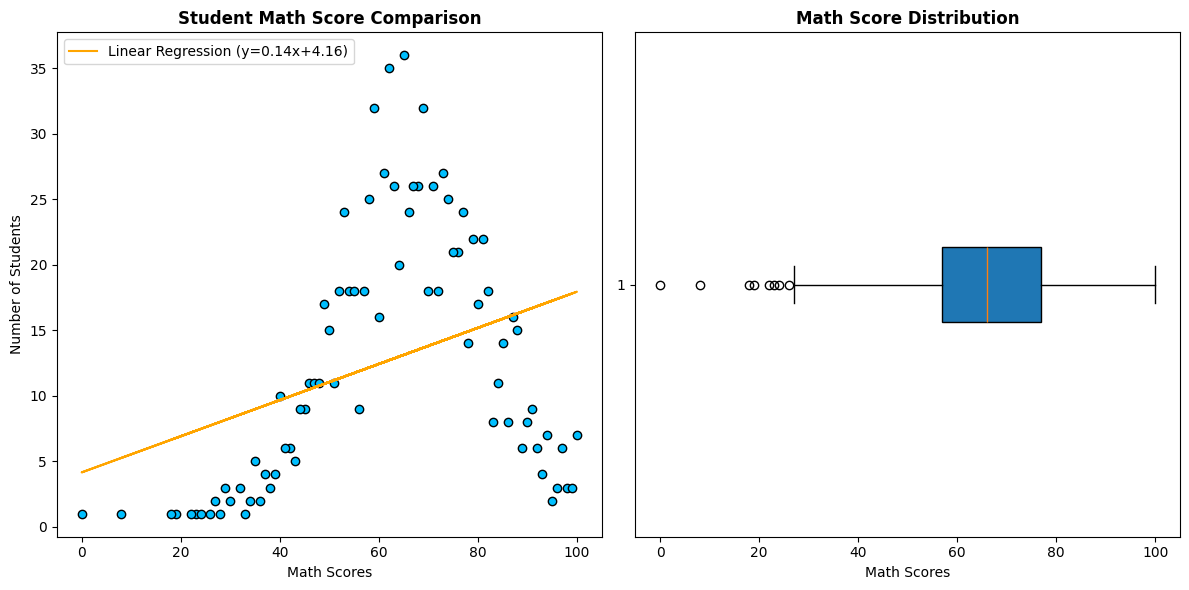

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: Math Score, dtype: float64


In [21]:
#Math Score - scatterplot
mathScore = df['Math Score'].value_counts()

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(mathScore.index, mathScore.values)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with regression line on the first subplot
ax1.scatter(mathScore.index, mathScore.values, color='deepskyblue', edgecolors='black')
line = slope * mathScore.index + intercept
ax1.plot(mathScore.index, line, color='orange', label=f'Linear Regression (y={slope:.2f}x+{intercept:.2f})')
ax1.set_title('Student Math Score Comparison', fontweight='bold')
ax1.set_ylabel('Number of Students')
ax1.set_xlabel('Math Scores')
ax1.legend()

# Boxplot on the second subplot
ax2.boxplot(df['Math Score'].dropna(), vert=False, patch_artist=True)
ax2.set_title('Math Score Distribution', fontweight='bold')
ax2.set_xlabel('Math Scores')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
print(df['Math Score'].describe())

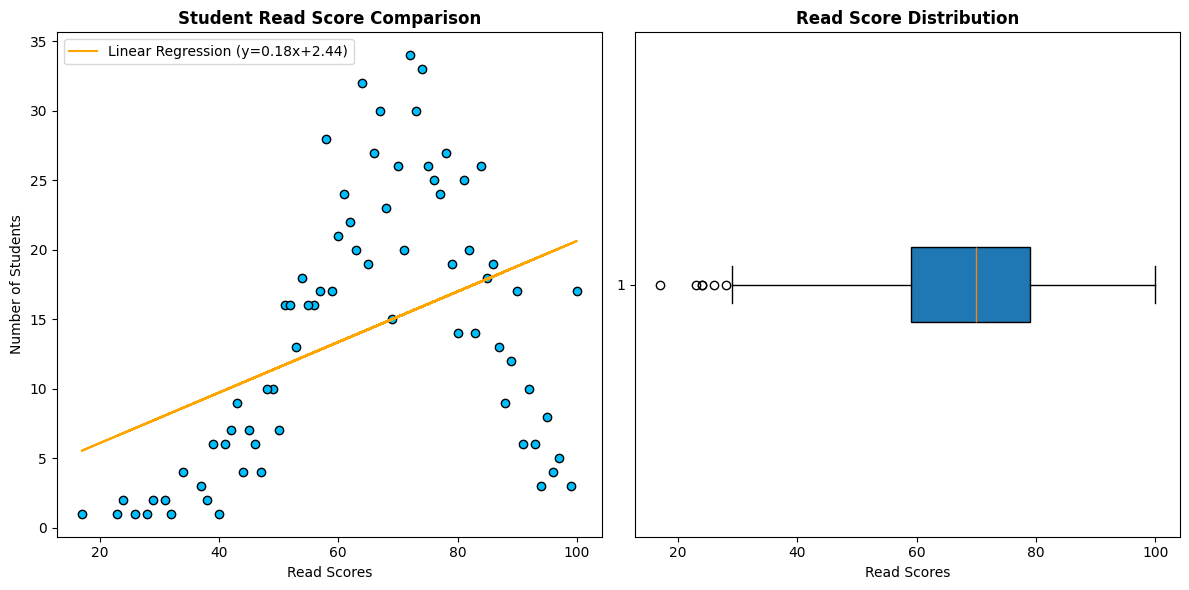

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: Read Score, dtype: float64


In [22]:
#Read Score
readScore = df['Read Score'].value_counts()

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(readScore.index, readScore.values)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with regression line on the first subplot
ax1.scatter(readScore.index, readScore.values, color='deepskyblue', edgecolors='black')
line = slope * readScore.index + intercept
ax1.plot(readScore.index, line, color='orange', label=f'Linear Regression (y={slope:.2f}x+{intercept:.2f})')
ax1.set_title('Student Read Score Comparison', fontweight='bold')
ax1.set_ylabel('Number of Students')
ax1.set_xlabel('Read Scores')
ax1.legend()

# Boxplot on the second subplot
ax2.boxplot(df['Read Score'].dropna(), vert=False, patch_artist=True)
ax2.set_title('Read Score Distribution', fontweight='bold')
ax2.set_xlabel('Read Scores')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
print(df['Read Score'].describe())

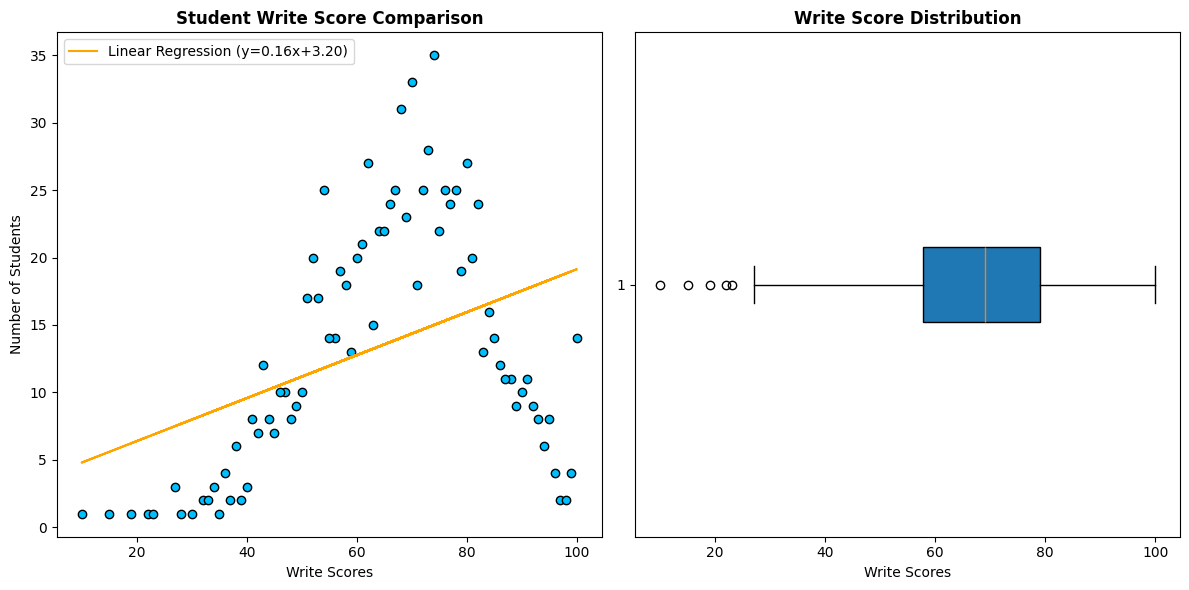

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: Write Score, dtype: float64


In [23]:
#Writing Score
writeScore = df['Write Score'].value_counts()

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(writeScore.index, writeScore.values)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with regression line on the first subplot
ax1.scatter(writeScore.index, writeScore.values, color='deepskyblue', edgecolors='black')
line = slope * writeScore.index + intercept
ax1.plot(writeScore.index, line, color='orange', label=f'Linear Regression (y={slope:.2f}x+{intercept:.2f})')
ax1.set_title('Student Write Score Comparison', fontweight='bold')
ax1.set_ylabel('Number of Students')
ax1.set_xlabel('Write Scores')
ax1.legend()

# Boxplot on the second subplot
ax2.boxplot(df['Write Score'].dropna(), vert=False, patch_artist=True)
ax2.set_title('Write Score Distribution', fontweight='bold')
ax2.set_xlabel('Write Scores')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
print(df['Write Score'].describe())
#END OF UNIVERIATE ANALYSIS

In [24]:
#STARTED -  MULTIVERIATE ANALYSIS 

#Gender - Test Preperation Course 
gender_remap = {1: 'male', 0: 'female'}
df['Gender'] = df['Gender'].replace(gender_remap)

gender_test_course = df[['Gender','Test Prep Course']]

gtx = gender_test_course.value_counts()

gender_test_course



,Gender,Test Prep Course
0,female,none
1,female,completed
2,female,none
3,male,none
4,male,none
...,...,...
995,female,completed
996,male,none
997,female,completed
998,female,completed


In [25]:
gtx

Gender  Test Prep Course
female  none                334
male    none                308
female  completed           184
male    completed           174
Name: count, dtype: int64

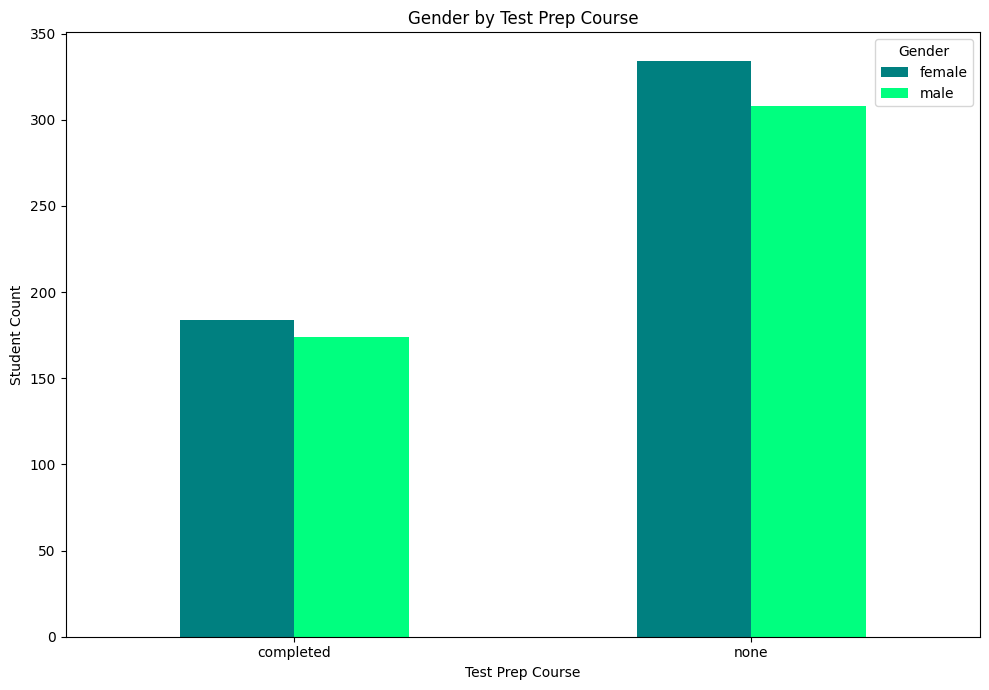

In [26]:

gtx = gender_test_course.value_counts().reset_index()
gtx.columns = ['Gender', 'Test Prep Course', 'Count']

pivot_gtx = gtx.pivot(index='Test Prep Course', columns='Gender', values='Count')

# Plot the grouped bar chart
pivot_gtx.plot(kind='bar', figsize=(10, 7), color=['Teal','springgreen'])

# Customizing the chart
plt.title('Gender by Test Prep Course')
plt.xlabel('Test Prep Course')
plt.ylabel('Student Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()


In [27]:

#GENDER BY TEST METRICS 
g_metrics = df[['Gender','Math Score', 'Read Score', 'Write Score']]
g_metrics

,Gender,Math Score,Read Score,Write Score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75
...,...,...,...,...
995,female,88,99,95
996,male,62,55,55
997,female,59,71,65
998,female,68,78,77


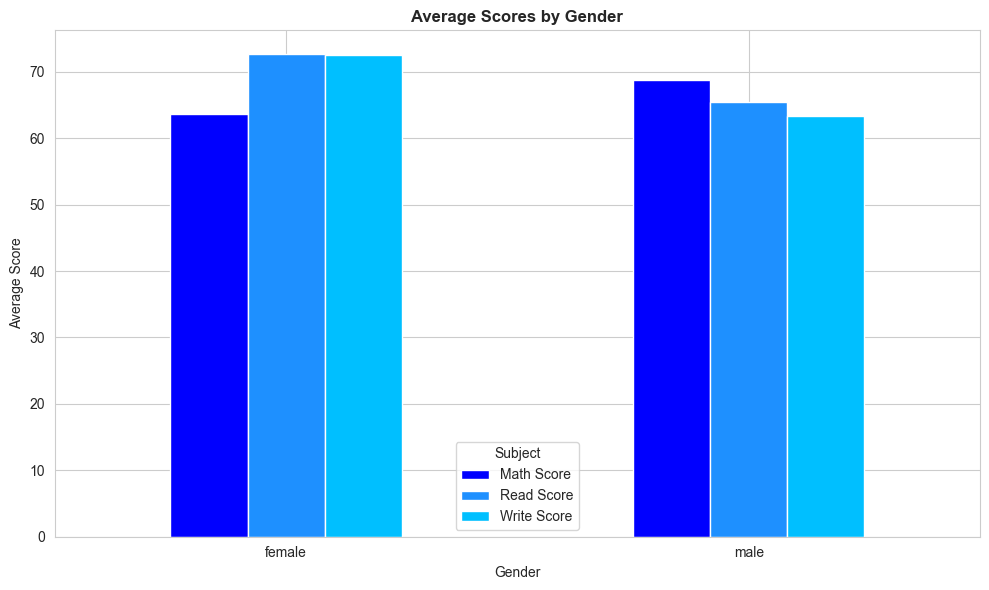

In [174]:
#GENDER BY TEST METRICS GROUP BY BAR CHART
# Assuming 'g_metrics' is your DataFrame
g_metric = df[['Gender', 'Math Score', 'Read Score', 'Write Score']]

# Plot the grouped bar chart
scores_by_gender = g_metric.groupby('Gender').mean()
scores_by_gender.plot(kind='bar', figsize=(10, 6), color=['blue','dodgerblue','deepskyblue'], stacked=False)

# Customizing the chart
plt.title('Average Scores by Gender', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subject')

# Show the plot
plt.tight_layout()
plt.show()


In [47]:
#RACE GROUPS BY PARENTAL EDUCATION LEVEL
race_by_parent = df[['Race','Parental Education Level']]
race_by_parent

,Race,Parental Education Level
0,group B,bachelor's degree
1,group C,some college
2,group B,master's degree
3,group A,associate's degree
4,group C,some college
...,...,...
995,group E,master's degree
996,group C,high school
997,group C,high school
998,group D,some college


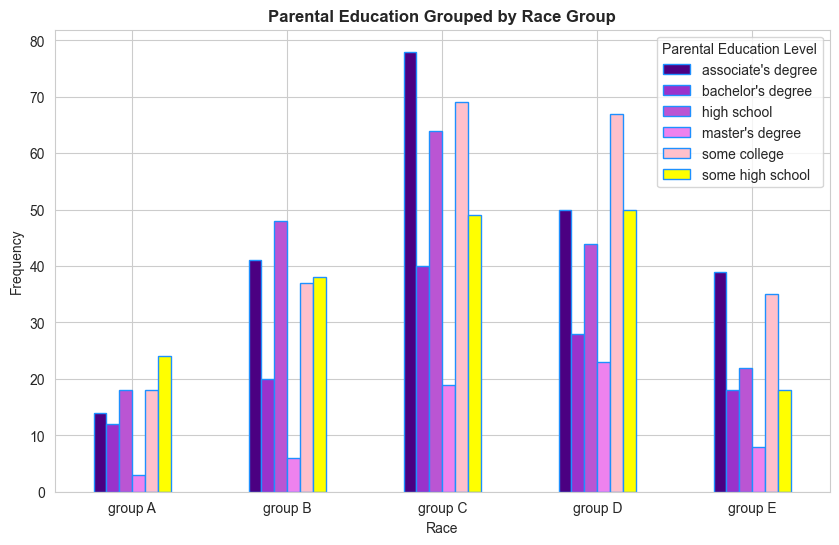

In [139]:
#RACE BY PARENTAL EDUCATION LEVEL BAR CHART

#GROUP BY RACE
race_parent_grouped = race_by_parent.groupby(['Race', 'Parental Education Level']).size().unstack()
race_parent_grouped.plot(kind='bar', figsize=(10, 6), color=['indigo','darkorchid','mediumorchid','violet','pink','yellow'],edgecolor= 'dodgerblue', stacked=False)
plt.title('Parental Education Grouped by Race Group', fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

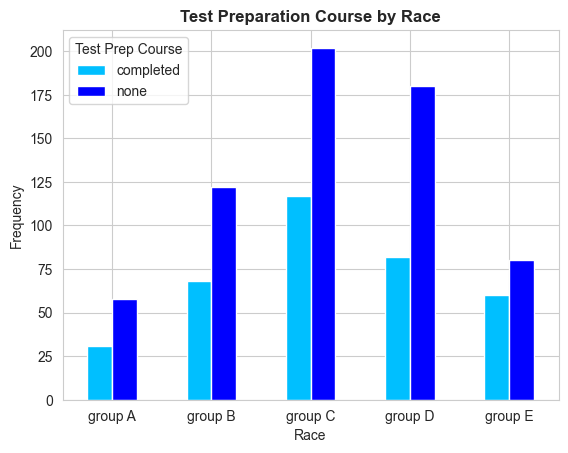

<Figure size 1000x600 with 0 Axes>

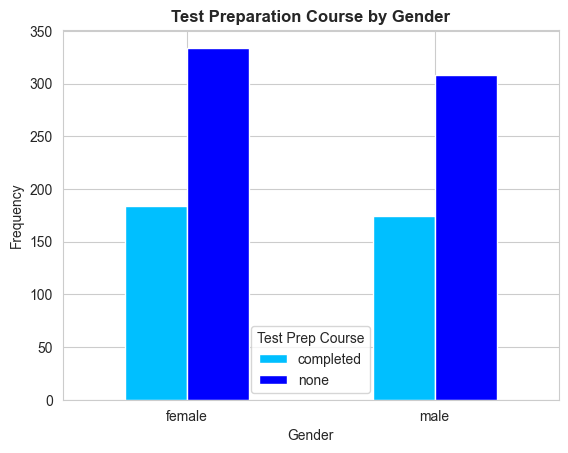

In [143]:
#TEST PREPERATION BY RACE & Gender GROUP CHARTS 
Race_by_test_prep = df[['Race','Test Prep Course','Gender']]
race_data = Race_by_test_prep.groupby(['Race','Test Prep Course']).size().unstack()
gender_data = df.groupby(['Gender', 'Test Prep Course']).size().unstack()

plt.figure(figsize=(10, 6))
race_data.plot(kind='bar', color=['deepskyblue','blue'], stacked=False)
plt.title('Test Preparation Course by Race',fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
gender_data.plot(kind='bar', color=['deepskyblue','blue'], stacked=False)
plt.title('Test Preparation Course by Gender',fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


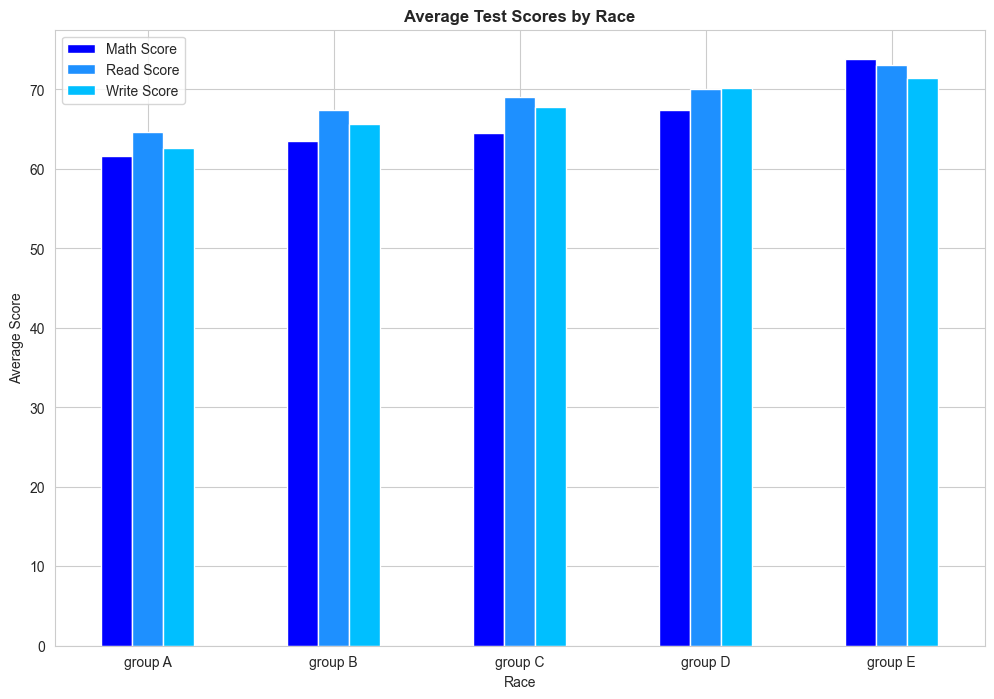

In [144]:
#TEST METRICS GROUOED BY RACE
# Group the data by 'Race' and calculate the mean for each score category
test_data = df[['Race', 'Math Score', 'Read Score', 'Write Score']]


# Plot the average scores by race using a bar chart
average_scores_by_race = test_data.groupby('Race').mean()
average_scores_by_race.plot(kind='bar', figsize=(12,8), color=['blue','dodgerblue','deepskyblue'])
# Set the title and labels
plt.title('Average Test Scores by Race', fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('Race')
plt.ylabel('Average Score')

# Show the plot
plt.show()

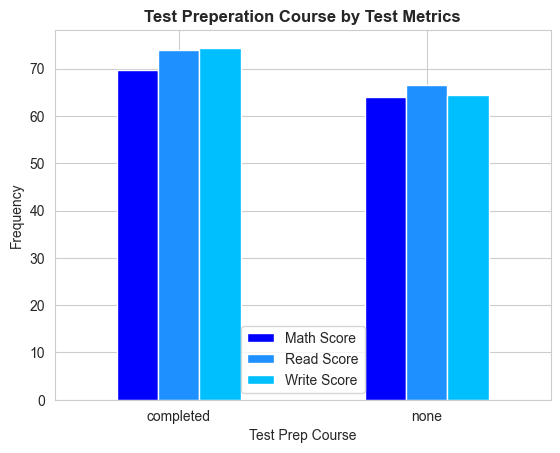

In [160]:
#TEST PREPERATION BY GRADE METRICS
test_prep_data = df[['Test Prep Course','Math Score', 'Read Score', 'Write Score']]
test_prep_data_grouped = test_prep_data.groupby('Test Prep Course').mean()

#plot
test_prep_data_grouped.plot(kind='bar', color=['blue','dodgerblue','deepskyblue'])
plt.title('Test Preperation Course by Test Metrics', fontweight='bold')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


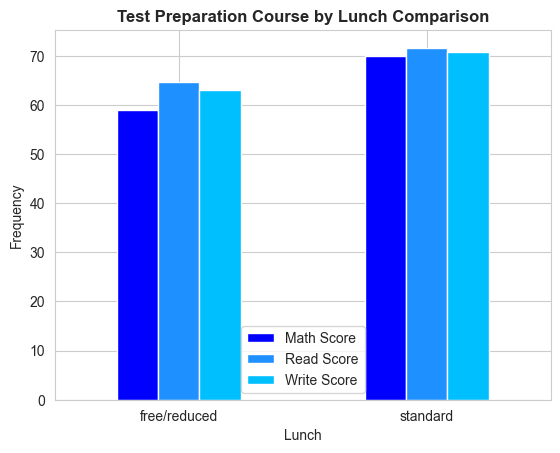

In [180]:
lunch_test_metrics = df[['Lunch','Math Score','Read Score', 'Write Score']]
lunch_groupby = lunch_test_metrics.groupby('Lunch').mean()

lunch_groupby.plot(kind='bar', color=['blue','dodgerblue','deepskyblue'], stacked=False)
plt.title('Test Preparation Course by Lunch Comparison', fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()